In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Task 1: Load dataset and identify missing values
data = {
    'Feature1': [1, 2, np.nan, 4, 5, 6, np.nan, 8, 9, 10],
    'Feature2': [5, 4, 3, 2, np.nan, 0, 1, np.nan, 3, 4],
    'Target': [10, 9, 7, 6, 5, 4, 3, 2, 1, 0]
}
df = pd.DataFrame(data)

print("Missing values per column:")
print(df.isnull().sum())

# Task 2: Replace missing values (mean for numerical features)
df_filled = df.copy()
for col in ['Feature1', 'Feature2']:
    if df_filled[col].dtype in ['float64', 'int64']:
        mean_value = df_filled[col].mean()
        df_filled[col].fillna(mean_value, inplace=True)

print("\nData after filling missing values:")
print(df_filled)

# Task 3: Compare model performance with and without handling missing data

# Prepare data without handling missing values (drop rows with missing)
df_dropna = df.dropna()

X_dropna = df_dropna[['Feature1', 'Feature2']]
y_dropna = df_dropna['Target']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_dropna, y_dropna, test_size=0.3, random_state=42)
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
pred1 = model1.predict(X_test1)
mse_dropna = mean_squared_error(y_test1, pred1)

# Prepare data with missing values filled
X_filled = df_filled[['Feature1', 'Feature2']]
y_filled = df_filled['Target']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_filled, y_filled, test_size=0.3, random_state=42)
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
pred2 = model2.predict(X_test2)
mse_filled = mean_squared_error(y_test2, pred2)

print(f"\nMSE without handling missing values (drop rows): {mse_dropna:.4f}")
print(f"MSE with mean imputation for missing values: {mse_filled:.4f}")


Missing values per column:
Feature1    2
Feature2    2
Target      0
dtype: int64

Data after filling missing values:
   Feature1  Feature2  Target
0     1.000      5.00      10
1     2.000      4.00       9
2     5.625      3.00       7
3     4.000      2.00       6
4     5.000      2.75       5
5     6.000      0.00       4
6     5.625      1.00       3
7     8.000      2.75       2
8     9.000      3.00       1
9    10.000      4.00       0

MSE without handling missing values (drop rows): 1.0000
MSE with mean imputation for missing values: 0.3862


In [2]:
import pandas as pd

# Sample dataset with duplicates
data = {
    'ID': [1, 2, 3, 4, 4, 5, 6, 6, 7],
    'Feature': ['A', 'B', 'C', 'D', 'D', 'E', 'F', 'F', 'G'],
    'Value': [10, 20, 30, 40, 40, 50, 60, 60, 70]
}

df = pd.DataFrame(data)

# Task 1: Identify duplicates
print("Original dataset shape:", df.shape)
duplicates = df.duplicated()
print("Duplicate rows detected:\n", df[duplicates])

# Task 2: Remove duplicates
df_no_duplicates = df.drop_duplicates()
print("\nDataset shape after removing duplicates:", df_no_duplicates.shape)

# Task 3: Explanation (print statement for clarity)
explanation = """
Duplicate data can skew analysis by giving undue weight to repeated entries,
leading to biased models that overfit these redundant samples.
Removing duplicates ensures the model learns from unique data points,
improving generalization and prediction accuracy.
"""
print(explanation)


Original dataset shape: (9, 3)
Duplicate rows detected:
    ID Feature  Value
4   4       D     40
7   6       F     60

Dataset shape after removing duplicates: (7, 3)

Duplicate data can skew analysis by giving undue weight to repeated entries,
leading to biased models that overfit these redundant samples.
Removing duplicates ensures the model learns from unique data points,
improving generalization and prediction accuracy.



In [3]:
import pandas as pd

# Sample dataset with incorrect data types
data = {
    'ID': ['1', '2', '3', '4', '5'],
    'Age': ['25', '30', '35', '40', 'forty-five'],  # Notice 'forty-five' is a string, not numeric
    'Income': ['50000', '60000', '70000', '80000', '90000']
}

df = pd.DataFrame(data)

# Task 1: Convert 'ID' and 'Income' from string to integer
df['ID'] = pd.to_numeric(df['ID'], errors='coerce')          # Convert to numeric, coercing errors to NaN
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

# Task 2: Identify and fix inconsistent types in 'Age' column
# Attempt conversion, invalid parsing ('forty-five') becomes NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

print("Data after type conversions:\n", df)

# Task 3: Explanation
explanation = """
Correct data types are essential for feature engineering because:
- Numeric operations (e.g., scaling, arithmetic) require numeric types.
- Machine learning models expect features in appropriate formats.
- Incorrect types can cause errors or misleading analysis.
- Ensuring consistent types enables robust, reproducible workflows.
"""
print(explanation)


Data after type conversions:
    ID   Age  Income
0   1  25.0   50000
1   2  30.0   60000
2   3  35.0   70000
3   4  40.0   80000
4   5   NaN   90000

Correct data types are essential for feature engineering because:
- Numeric operations (e.g., scaling, arithmetic) require numeric types.
- Machine learning models expect features in appropriate formats.
- Incorrect types can cause errors or misleading analysis.
- Ensuring consistent types enables robust, reproducible workflows.



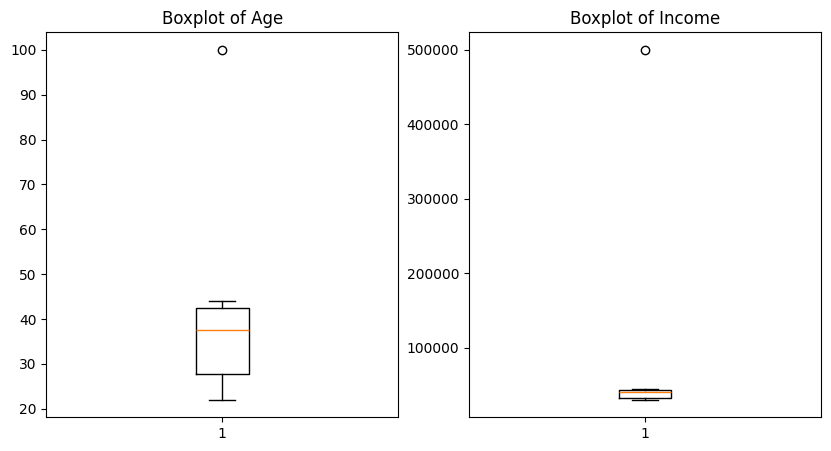

Data after removing outliers:
    Age  Income
0   22   30000
1   25   32000
2   27   31000
3   30   35000
4   35   40000
5   40   42000
6   41   43000
7   43   44000
8   44   45000
9  100  500000

One effective technique to handle outliers is the Interquartile Range (IQR) method:
- Calculate Q1 (25th percentile) and Q3 (75th percentile).
- Compute IQR = Q3 - Q1.
- Define outliers as data points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.
- Remove or cap these outliers to reduce their effect.
This method is robust and widely used in practice.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset with outliers
data = {
    'Age': [22, 25, 27, 30, 35, 40, 41, 43, 44, 100],  # 100 is an outlier
    'Income': [30000, 32000, 31000, 35000, 40000, 42000, 43000, 44000, 45000, 500000]  # 500000 is an outlier
}

df = pd.DataFrame(data)

# Task 1: Visualize using boxplot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['Age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
plt.boxplot(df['Income'])
plt.title('Boxplot of Income')

plt.show()

# Task 2: Remove outliers using z-score method (threshold = 3)
from scipy.stats import zscore

df_numeric = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(df_numeric))
filtered_entries = (z_scores < 3).all(axis=1)
df_clean = df[filtered_entries]

print("Data after removing outliers:\n", df_clean)

# Task 3: Research summary (example)
technique_summary = """
One effective technique to handle outliers is the Interquartile Range (IQR) method:
- Calculate Q1 (25th percentile) and Q3 (75th percentile).
- Compute IQR = Q3 - Q1.
- Define outliers as data points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.
- Remove or cap these outliers to reduce their effect.
This method is robust and widely used in practice.
"""

print(technique_summary)
